In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
data1 = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data1.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

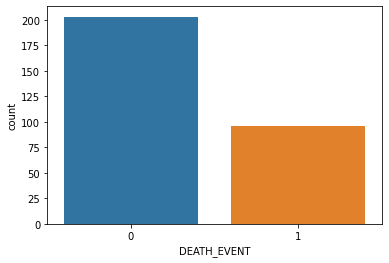

In [5]:
sns.countplot(x= data1["DEATH_EVENT"])

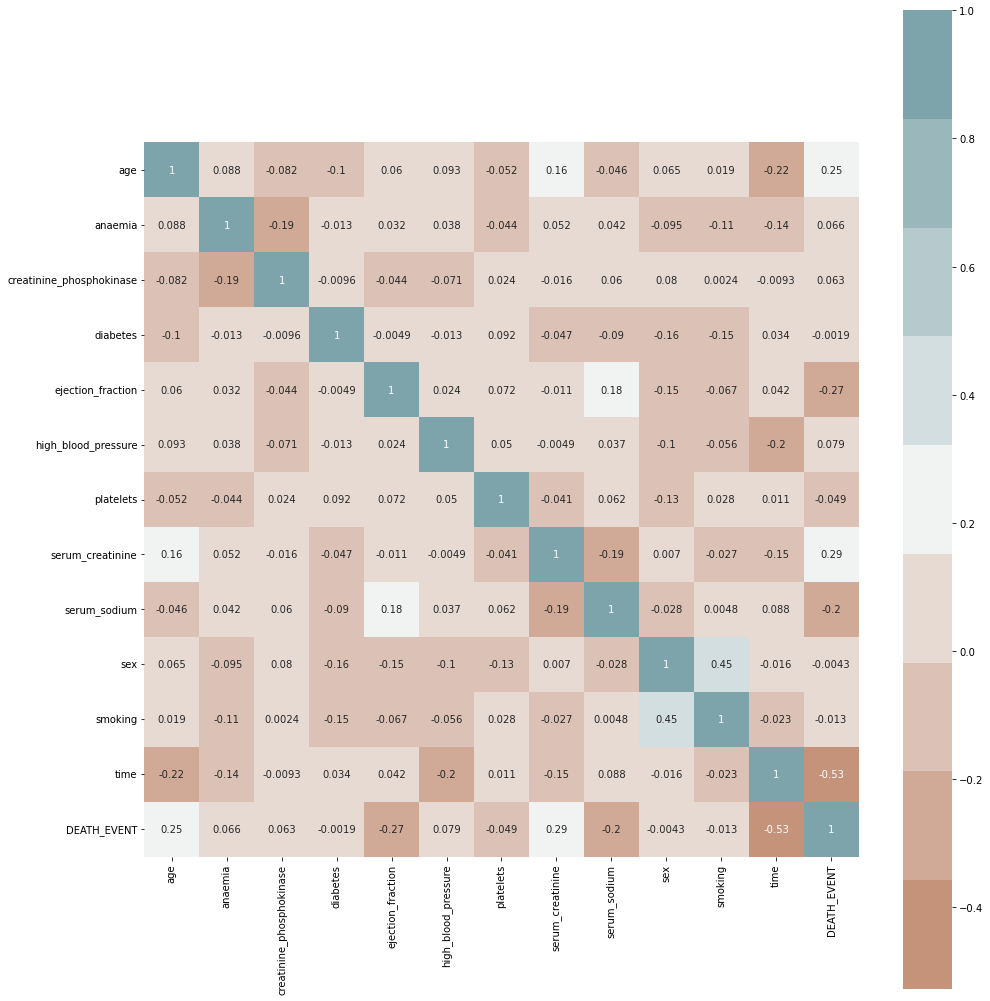

In [6]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(755,567,  s=40, l=65, n=9)
co_relationmat = data1.corr()
plt.subplots(figsize=(16,18))
sns.heatmap(co_relationmat,cmap= cmap,annot=True, square=True);


Text(0.5, 1.0, 'Age Distribution')

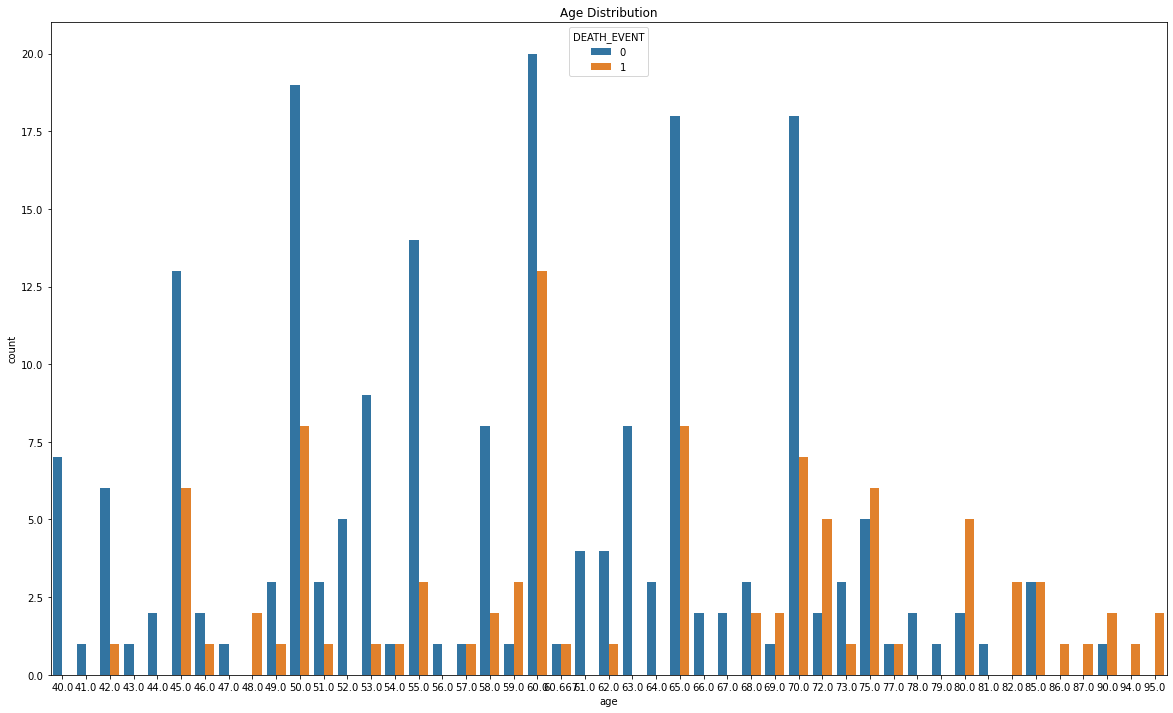

In [34]:
#Evauating age distrivution 
plt.figure(figsize=(20,12))
w_d =sns.countplot(x=data1['age'],data=data1, hue ="DEATH_EVENT")
w_d.set_title("Age Distribution", color="black")


In [9]:
X1=data1.drop(["DEATH_EVENT"],axis=1)
y1=data1["DEATH_EVENT"]


In [10]:
names_cols = list(X1.columns)
std_sc = preprocessing.StandardScaler()
df_x= std_sc.fit_transform(X1)
df_x = pd.DataFrame(df_x, columns=names_cols)   
df_x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


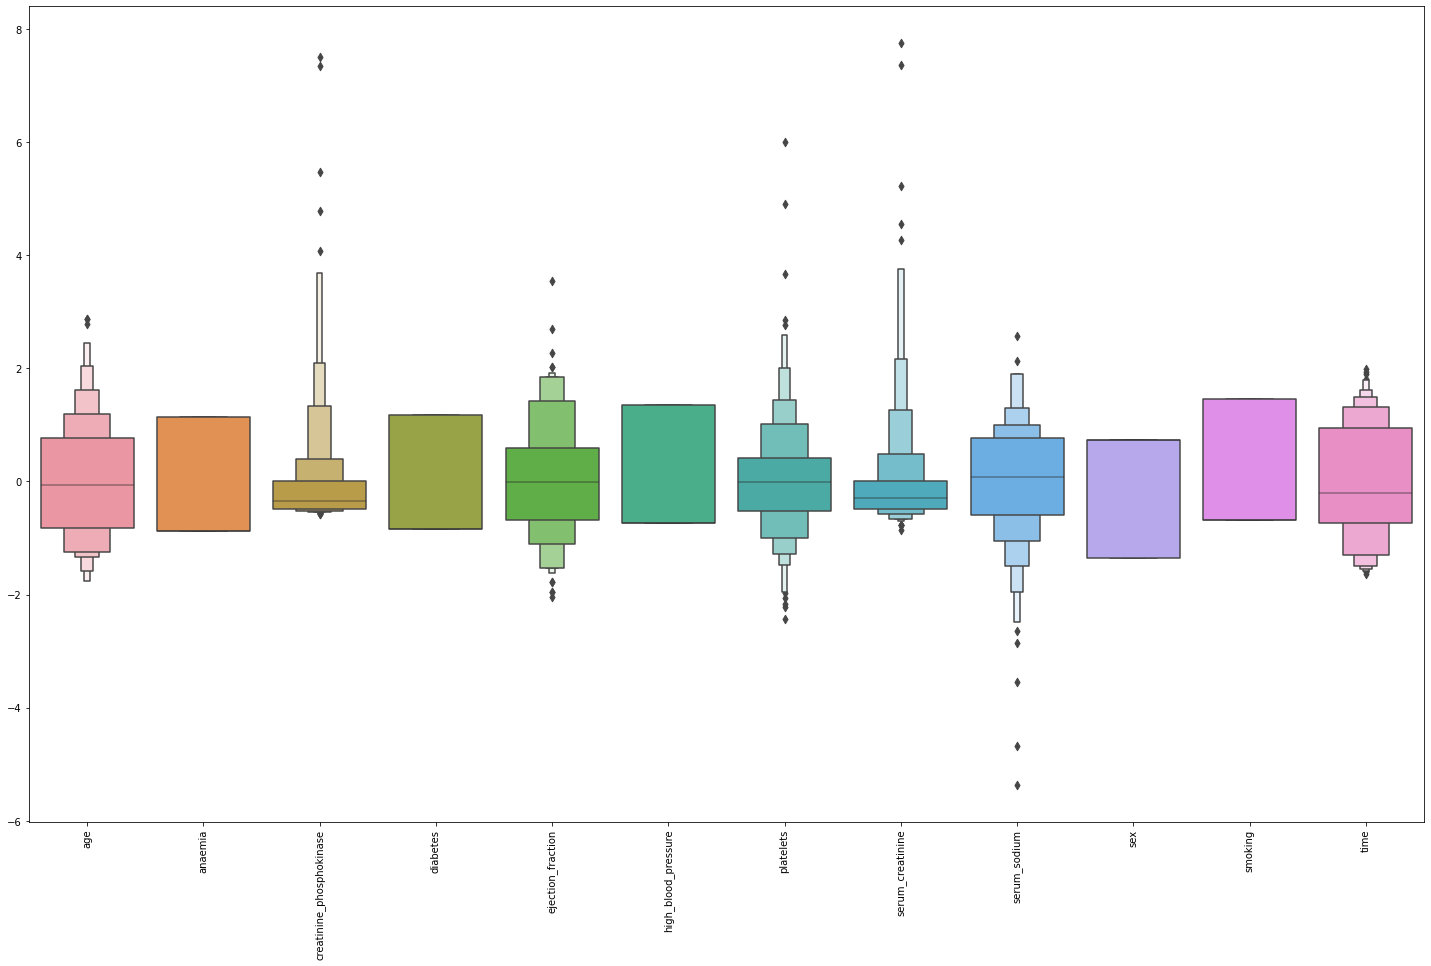

In [11]:
plt.figure(figsize=(25,15))
sns.boxenplot(data = df_x)
plt.xticks(rotation=90)
plt.show()
#scaled features graphs

In [12]:
X_train, X_test, y_train,y_test = train_test_split(df_x,y1,test_size=0.28,random_state=8)


In [13]:
#task 1
early_stopping1 = callbacks.EarlyStopping(
    min_delta=0.002, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the ANN
model1 = Sequential()

# layers
model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
model1.summary


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000014B6317B400>>

In [15]:
# Train the ANN
history1 = model1.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping1], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 10s 300ms/step - loss: 0.6928 - accuracy: 0.6686 - val_loss: 0.6922 - val_accuracy: 0.6744
Epoch 2/500
6/6 [==============================] - 0s 35ms/step - loss: 0.6920 - accuracy: 0.6453 - val_loss: 0.6912 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 32ms/step - loss: 0.6913 - accuracy: 0.6453 - val_loss: 0.6904 - val_accuracy: 0.6744
Epoch 4/500
6/6 [==============================] - 0s 31ms/step - loss: 0.6905 - accuracy: 0.6453 - val_loss: 0.6894 - val_accuracy: 0.6744
Epoch 5/500
6/6 [==============================] - 0s 30ms/step - loss: 0.6897 - accuracy: 0.6453 - val_loss: 0.6884 - val_accuracy: 0.6744
Epoch 6/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6889 - accuracy: 0.6453 - val_loss: 0.6874 - val_accuracy: 0.6744
Epoch 7/500
6/6 [==============================] - 0s 38ms/step - loss: 0.6880 - accuracy: 0.6453 - val_loss: 0.6865 - val_accuracy: 0.6744
Epoch 8/500
6/6 [=

In [16]:
val_accuracy1 = np.mean(history1.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy1*100))



val_accuracy: 67.44%


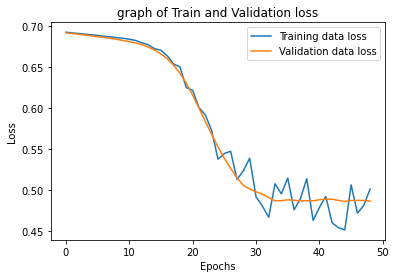

In [17]:
df_history1 = pd.DataFrame(history1.history)

plt.plot(df_history1 .loc[:, ['loss']], label='Training data loss')
plt.plot(df_history1 .loc[:, ['val_loss']], label='Validation data loss')
plt.title('graph of Train and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()


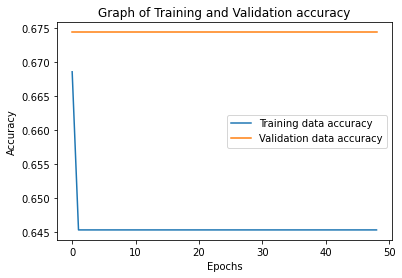

In [35]:
df_history2 = pd.DataFrame(history1.history)

plt.plot(df_history2.loc[:, ['accuracy']], label='Training data accuracy')
plt.plot(df_history2.loc[:, ['val_accuracy']], label='Validation data accuracy')

plt.title('Graph of Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Predicting the test set results
pred = model1.predict(X_test)
pred = (pred > 0.5)
np.set_printoptions()


3/3 [==============================] - 0s 12ms/step


<AxesSubplot:>

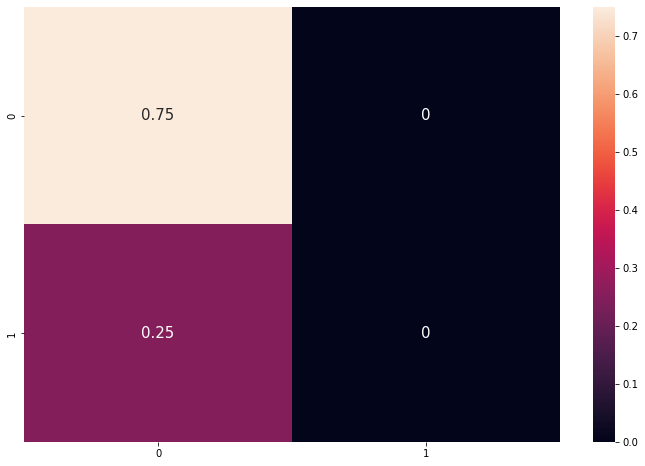

In [20]:

plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix) ,annot = True, annot_kws = {'size':15})


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00        21

    accuracy                           0.75        84
   macro avg       0.38      0.50      0.43        84
weighted avg       0.56      0.75      0.64        84



C:\Users\surab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\surab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Task2
ibv = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
icv = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
ov = 'DEATH_EVENT'


In [23]:
timefeatures = ibv+icv
timefeatures



['anaemia',
 'diabetes',
 'high_blood_pressure',
 'sex',
 'smoking',
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [24]:
x1 = data1.values #returns a numpy array
mi_mx_sc = preprocessing.MinMaxScaler()
x_sc = mi_mx_sc.fit_transform(x1)
n_data = pd.DataFrame(x_sc, columns=data1.columns)


In [25]:
ia = n_data[timefeatures].to_numpy()[:,:,np.newaxis]
oa = n_data[ov].to_numpy()[:,np.newaxis]
print(ia.shape)
print(oa.shape)


(299, 12, 1)
(299, 1)


In [26]:
SIZE_batch = 1
DATASIZE = ia.shape[0]
base_depth1 = 128
conv_filters1 = 512
dropout_prob1 = 0.4
activation_func1 = tf.nn.leaky_relu


In [27]:

tfkl1 = tf.keras.layers

In [28]:
#FUNCTION TO PLOT THE TRAINING
def plot_training(fit, evaluation):
    best_epoch1 = fit.epoch[fit.history['val_loss'].index(min(fit.history['val_loss']))]
    fig, ax = plt.subplots(2,1,figsize=(3,5))
    
    ax[0].plot(fit.epoch,fit.history['val_loss'],'.-',color='blue', label='validation1')
    ax[0].plot(fit.epoch,fit.history['loss'],'.-',color='green', label='train1')
    ax[0].set(ylabel='Loss',ylim=[0,1])
    ax[0].axvspan(best_epoch1-0.5,best_epoch1+0.5, alpha=0.5, color='pink')
    #ax[0].autoscale(False)
    ax[0].scatter(best_epoch1, evaluation[0],s=2, zorder=1,color='yellow')
    ax[0].legend()
    
    ax[1].plot(fit.epoch,fit.history['val_accuracy'],'.-',color='green', label='validation')
    ax[1].plot(fit.epoch,fit.history['accuracy'],'.-',color='red', label='train')
    ax[1].set(ylabel='Accuracy',ylim=[0,1])
    ax[1].axvspan(best_epoch1-0.5,best_epoch1+0.5, alpha=0.5, color='blue')
    #ax[1].autoscale(False)
    ax[1].scatter(best_epoch1, evaluation[1],s=2, zorder=1,color='green')
    ax[1].legend()
    plt.show()
    print("[Best epoch]:", best_epoch1)
    print("[Loss]:", min(fit.history['val_loss']), " test:", evaluation[0])
    print("[Accuracy]:", max(fit.history['val_accuracy']), " test:", evaluation[1])


In [29]:
train_size1 = int(0.6 * DATASIZE)//SIZE_batch
val_size1 = int(0.2 * DATASIZE)//SIZE_batch
test_size1 = int(0.2 * DATASIZE)//SIZE_batch

dataset1 = tf.data.Dataset.from_tensor_slices( (ia,oa) ).shuffle(1000).batch(SIZE_batch)
train_data = dataset1.take(train_size1)
test_data= dataset1.skip(train_size1)
valid_data = test_data.skip(test_size1)
test_data= test_data.take(test_size1)

print("\n[Train data size]:",len(list(train_data)),"\n[Valid data size]:", len(list(valid_data)),"\n[Test data size]:", len(list(test_data)))



[Train data size]: 179 
[Valid data size]: 61 
[Test data size]: 59


In [32]:
model2= tf.keras.Sequential([
    tf.keras.Input(shape=(len(timefeatures),1,)),
    tfkl1.Conv1D(filters=conv_filters1,kernel_size=12, strides=2),
    tfkl1.Dropout(dropout_prob1),
    tfkl1.Dense(base_depth1,activation=activation_func1),
    tfkl1.Dense(base_depth1,activation=activation_func1),
    tfkl1.Dense(base_depth1,activation=activation_func1),
    tfkl1.Dropout(dropout_prob1),
    tfkl1.Dense(1,activation=tf.nn.sigmoid)
], name="heart_failure_model_time")

model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])


Restoring model weights from the end of the best epoch: 137.
Epoch 237: early stopping
59/59 [==============================] - 0s 8ms/step - loss: 0.3244 - accuracy: 0.8644
2


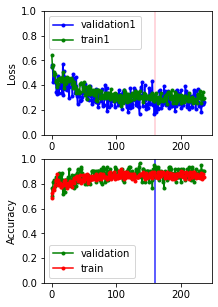

[Best epoch]: 159
[Loss]: 0.16615357995033264  test: 0.3244131803512573
[Accuracy]: 0.9672130942344666  test: 0.8644067645072937


In [33]:
fit1 = model2.fit(train_data, epochs=400, validation_data=valid_data,
                    batch_size=SIZE_batch, verbose=False,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.000001),
                               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0, patience=100, verbose=1, mode='auto', restore_best_weights=True)])

evaluation1 = model2.evaluate(test_data)
print(len(evaluation1))
plot_training(fit1, evaluation1)